<a href="https://colab.research.google.com/github/Washington-001/robotics/blob/main/DeepLearningAssignment_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

In [ ]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize image data to range between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input requirements
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convert labels into one-hot vectors
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)


4422102/4422102 [==============================] - 0s 0us/step


**BUILD MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Design a convolutional neural network (CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**MODEL TRAINING**

In [ ]:
# Train the model on the training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 47s 60ms/step - loss: 0.5846 - accuracy: 0.7841 - val_loss: 0.4175 - val_accuracy: 0.8463
Epoch 2/10
750/750 [==============================] - 42s 56ms/step - loss: 0.3677 - accuracy: 0.8674 - val_loss: 0.3512 - val_accuracy: 0.8717
Epoch 3/10
750/750 [==============================] - 41s 55ms/step - loss: 0.3094 - accuracy: 0.8876 - val_loss: 0.3058 - val_accuracy: 0.8894
Epoch 4/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2764 - accuracy: 0.8982 - val_loss: 0.3011 - val_accuracy: 0.8927
Epoch 5/10
750/750 [==============================] - 49s 66ms/step - loss: 0.2512 - accuracy: 0.9087 - val_loss: 0.2998 - val_accuracy: 0.8905
Epoch 6/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2314 - accuracy: 0.9143 - val_loss: 0.2667 - val_accuracy: 0.9043
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 0.2147 - accuracy: 0.9203 - val_loss: 0.2835 - val_accuracy:

**MODEL EVALUATION AND ANALYSIS**

313/313 [==============================] - 3s 9ms/step - loss: 0.2809 - accuracy: 0.9035


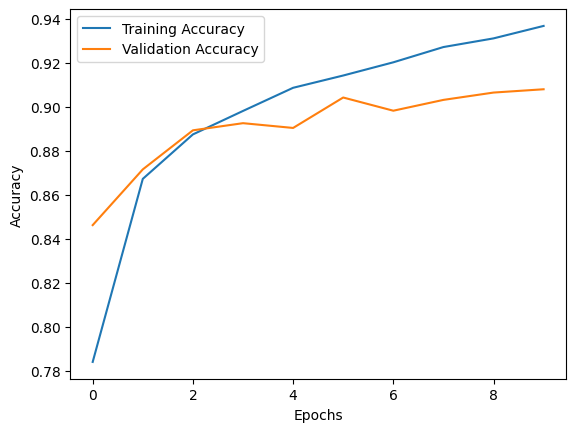

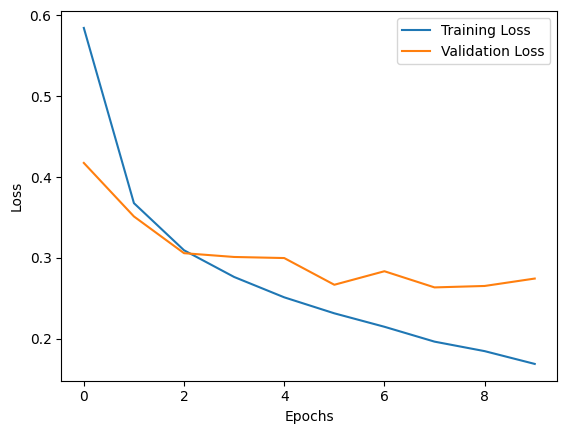

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Plot training and validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
